In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [2]:
data = pd.read_excel(r'D:\Download\Campania.xlsx',index_col=None, na_values=['NA'], usecols="A:F, N, O")
data

,Type,Detail_tag,Name,x,y,z,x_path,y_path
0,Structure,Entrance,Entrance 1,0.0,0.0,0.0,0.0,0.0
1,Shop,Electronics,Dyson,5.0,5.0,0.0,0.0,5.0
2,Shop,Optics,Optimissimo,-5.0,10.0,0.0,0.0,10.0
3,Shop,Wellness,David,5.0,10.0,0.0,0.0,10.0
4,Shop,Clothing,Tezenis,-5.0,15.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...
181,Shop,Clothing,Persona,55.0,25.0,0.0,NaN,NaN
182,Shop,Clothing,Kocca,52.5,21.0,0.0,NaN,NaN
183,Shop,Clothing,Marella,50.0,16.0,0.0,NaN,NaN
184,Shop,Clothing,Tommy Hilfiger,50.0,10.0,0.0,NaN,NaN


[(0.0, 0.0), (0.0, 0.1), (0.0, 0.2), (0.0, 0.30000000000000004), (0.0, 0.4), (0.0, 0.5), (0.0, 0.6000000000000001), (0.0, 0.7000000000000001), (0.0, 0.8), (0.0, 0.9), (0.0, 1.0), (0.0, 1.1), (0.0, 1.2000000000000002), (0.0, 1.3), (0.0, 1.4000000000000001), (0.0, 1.5), (0.0, 1.6), (0.0, 1.7000000000000002), (0.0, 1.8), (0.0, 1.9000000000000001), (0.0, 2.0), (0.0, 2.1), (0.0, 2.2), (0.0, 2.3000000000000003), (0.0, 2.4000000000000004), (0.0, 2.5), (0.0, 2.6), (0.0, 2.7), (0.0, 2.8000000000000003), (0.0, 2.9000000000000004), (0.0, 3.0), (0.0, 3.1), (0.0, 3.2), (0.0, 3.3000000000000003), (0.0, 3.4000000000000004), (0.0, 3.5), (0.0, 3.6), (0.0, 3.7), (0.0, 3.8000000000000003), (0.0, 3.9000000000000004), (0.0, 4.0), (0.0, 4.1000000000000005), (0.0, 4.2), (0.0, 4.3), (0.0, 4.4), (0.0, 4.5), (0.0, 4.6000000000000005), (0.0, 4.7), (0.0, 4.800000000000001), (0.0, 4.9), (0.0, 5.0), (0.0, 5.1000000000000005), (0.0, 5.2), (0.0, 5.300000000000001), (0.0, 5.4), (0.0, 5.5), (0.0, 5.6000000000000005), (

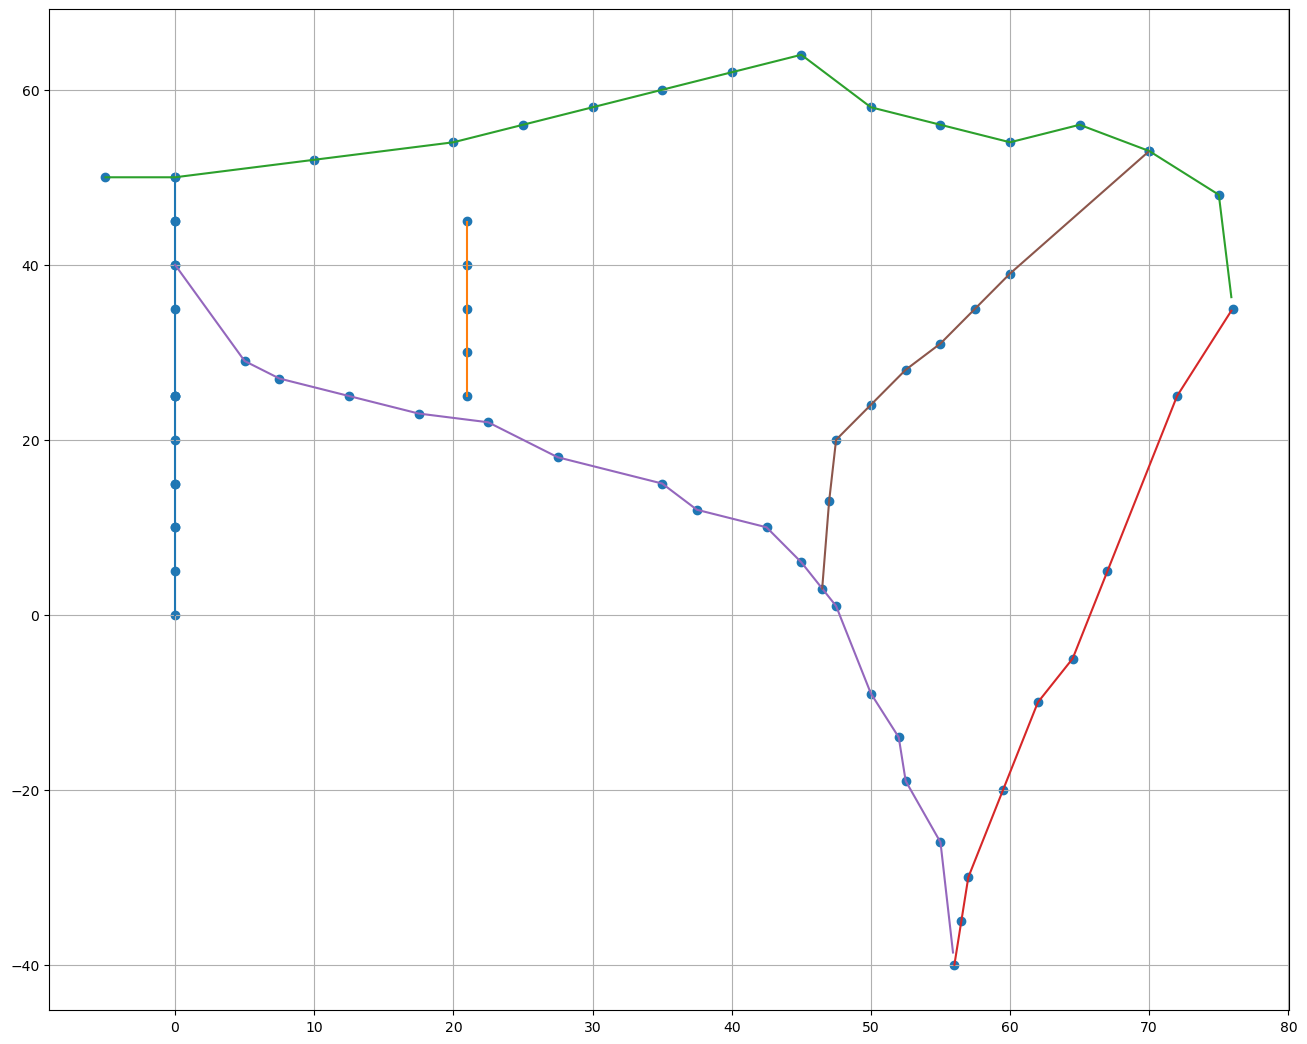

In [130]:
x_path = np.ravel((pd.DataFrame(data, columns = ['x_path']).dropna()).to_numpy())
y_path = np.ravel((pd.DataFrame(data, columns = ['y_path']).dropna()).to_numpy())
left_x_raw, left_y_raw = x_path[0:15], y_path[0:15]
midleft_x_raw, midleft_y_raw = x_path[15:20], y_path[15:20]
upper_x_raw, upper_y_raw = x_path[20:36], y_path[20:36]
right_x_raw, right_y_raw = x_path[35:44], y_path[35:44]
lower_x_raw, lower_y_raw = x_path[43:60], y_path[43:60]
midright_x_raw, midright_y_raw = x_path[60:len(x_path)], y_path[60:len(x_path)]

#print(x_path)
#print(np.linspace(0,51, 200))

plt.figure(figsize=(16,13))
plt.scatter(x_path, y_path)
upper = interpolate.interp1d(upper_x_raw, upper_y_raw, kind = 'linear')
right = interpolate.interp1d(right_x_raw, right_y_raw, kind = 'linear')
lower = interpolate.interp1d(lower_x_raw, lower_y_raw, kind = 'linear')
midright = interpolate.interp1d(midright_x_raw, midright_y_raw, kind = 'linear')
def left(x): return np.zeros(len(x))
def midleft(x): return np.ones(len(x))*21


width= .1
left_x, left_y = left(np.arange(min(left_y_raw), max(left_y_raw), width)) , np.arange(min(left_y_raw), max(left_y_raw), width)
midleft_x, midleft_y = midleft(np.arange(min(midleft_y_raw), max(midleft_y_raw), width)) , np.arange(min(midleft_y_raw), max(midleft_y_raw), width)
upper_x, upper_y = np.arange(min(upper_x_raw), max(upper_x_raw), width), upper(np.arange(min(upper_x_raw), max(upper_x_raw), width))
right_x, right_y = np.arange(min(right_x_raw), max(right_x_raw), width), right(np.arange(min(right_x_raw), max(right_x_raw), width))
lower_x, lower_y = np.arange(min(lower_x_raw), max(lower_x_raw), width), lower(np.arange(min(lower_x_raw), max(lower_x_raw), width))
midright_x, midright_y = np.arange(min(midright_x_raw), max(midright_x_raw), width), midright(np.arange(min(midright_x_raw), max(midright_x_raw), width))

print([(left_x[i],left_y[i]) for i in range(len(left_x))]) 


plt.plot(left_x, left_y)
plt.plot(midleft_x, midleft_y)
plt.plot(upper_x, upper_y)
plt.plot(right_x, right_y)
plt.plot(lower_x, lower_y)
plt.plot(midright_x, midright_y)
plt.grid()
plt.show()

In [ ]:
left_x, left_y = np.arange(min(left_x), max(left_x), 0.05) , upper(np.arange(min(left_x), max(left_x), 0.05))
midleft_x, midleft_y = x_path[15:20], y_path[15:20]
upper_x, upper_y = x_path[20:36], y_path[20:36]
right_x, right_y = x_path[35:44], y_path[35:44]
lower_x, lower_y = x_path[43:60], y_path[43:60]
midright_x, midright_y = x_path[60:len(x_path)], y_path[60:len(x_path)]
plt.plot(left_x, left_y)

In [18]:
Type = (data['Type'].dropna()).tolist()
Detail = (data['Detail_tag'].dropna()).tolist()
Name = (data['Name'].dropna()).tolist()
x = np.ravel((pd.DataFrame(data, columns = ['x']).dropna()).to_numpy())
y = np.ravel((pd.DataFrame(data, columns = ['y']).dropna()).to_numpy())
z = np.ravel((pd.DataFrame(data, columns = ['z']).dropna()).to_numpy())

Shops_ground = []
Food_ground = []
Elevators_ground = []
Shops_first = []
Food_first = []
Elevators_first = []
Entrances = []

for i in range(len(x)):
    obj = [Type[i], Detail[i], Name[i], x[i], y[i], z[i]]
    if z[i] == 0:
        if Type[i] == "Structure":
            if Detail[i] == "Elevator":
                Elevators_ground.append(obj)
            else:
                Entrances.append(obj)
        elif Type[i] == "Food":
            Food_ground.append(obj)
        elif Type[i] == "Shop":
            Shops_ground.append(obj)
    elif z[i]==1:
        if Type[i] == "Structure":
            if Detail[i] == "Elevator":
                Elevators_first.append(obj)
        elif Type[i] == "Food":
            Food_first.append(obj)
        elif Type[i] == "Shop":
            Shops_first.append(obj)

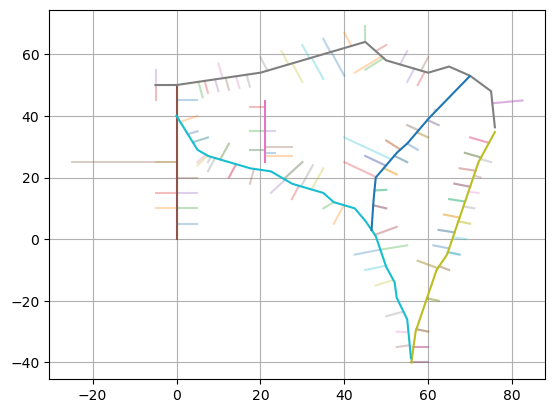

In [80]:
def distance(category):
    proj = []
    dist = []
    index = []
    for i in range(len(category)):
        pos, D =[], []
        for j in range(len(upper_x)):
            x,y = upper_x[j], upper_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(left_x)):
            x,y = left_x[j], left_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(midleft_x)):
            x,y = midleft_x[j], midleft_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(right_x)):
            x,y = right_x[j], right_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(midright_x)):
            x,y = midright_x[j], midright_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        for j in range(len(lower_x)):
            x,y = lower_x[j], lower_y[j]
            d = np.sqrt((x-category[i][3])**2+(y-category[i][4])**2)
            D.append(d)
            pos.append((x,y))
        #print(D)

        for j in range(len(D)):
            if D[j]==min(D):
                dist.append(D[j])
                proj.append(pos[j])
                break
                #print(min(D))
                #print(category[i][3], category[i][4], pos[j])
                #print(np.sqrt((pos[j][0]-category[i][3])**2+(pos[j][1]-category[i][4])**2)-D[j])
                #print("truth", [pos[j][0],category[i][3]], [pos[j][1], category[i][4]])

          
      
    return proj, dist

a = distance(Shops_ground)
#for i in range(len(Shops_ground)):
    #print(a[2][i], [Shops_ground[i][3], Shops_ground[i][4]])

for i in range(len(Shops_ground)):
    plt.plot([a[0][i][0], Shops_ground[i][3]], [a[0][i][1], Shops_ground[i][4]], alpha = 0.3)
plt.plot(left_x, left_y)
plt.plot(midleft_x, midleft_y)
plt.plot(upper_x, upper_y)
plt.plot(right_x, right_y)
plt.plot(lower_x, lower_y)
plt.plot(midright_x, midright_y)
plt.grid()
plt.show()

for i in range(len(Shops_ground)):
    Shops_ground[i].append(a[0][i][0])
    Shops_ground[i].append(a[0][i][1])
    Shops_ground[i].append(a[1][i])


In [125]:
def recursion(category_list, start, end, x_start, x_end, count):
    category_list.remove(start)
    for i in range(start[0].index(x_start), len(start[0])):
        for category in category_list:
            for j in range(len(category[0])):
                if start[0][i]==category[0][j] and start[1][i]==category[1][j]:
                    bifurcation = category
                    x_start_new = category[0][j]
                    if category_list.index(bifurcation)==category_list.index(end_path):
                        count += abs(end_path[0].index(x_end)-bifurcation[0].index(x_start_new))*width
                        return count
                    else:
                        recursion(category_list, bifurcation, end, x_start_new, x_end)
                        
                else:
                    count+=width

In [128]:
def dist(start, end, width=width):
    for i in Shops_ground:
        if i[2]==start:
            x_start = i[6]
            y_start = i[7]
        if i[2]==end:
            x_end = i[6]
            y_end = i[7]
    #categories_x = [left_x, midleft_x, upper_x, right_x, midright_x]
    #categories_y = [left_y, midleft_y, upper_y, right_y, midright_y] 
    categories = [(left_x,left_y),(midleft_x,midleft_y),(upper_x,upper_y),(right_x,right_y),(midright_x,midright_y)]
    cat_list = []
    for i in categories:
        x = i[0].tolist()
        y = i[1].tolist()
        cat_list.append((x,y))
        
    for category in cat_list:
        #print(len(category[0]))
        for i in range(len(category[0])):
            if x_start == category[0][i] and y_start == category[1][i]:
                start_path = category
                #print("ok")
                #print(start_path)
            if x_end == category[0][i] and y_end == category[1][i]:
                end_path = category

    if cat_list.index(start_path) == cat_list.index(end_path):
        distance = abs(end_path[0].index(x_end)-start_path[0].index(x_start))*width
        return distance
    
    count = 0
    categories2 = cat_list.copy()
    recursion(categories2, start_path, end_path, x_start, x_end, count)
    
            
        
print(dist("Primark", "Claire"))         

None
